<a href="https://colab.research.google.com/github/pcastelli-cba/dnrpa-robos-recuperos-autos/blob/main/Desafio1_Dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Leyendo archivos para generar dataset

Importar archivos de GIT

In [4]:
import pandas as pd
#anios = ['2018','2019','2020','2021','2022']
anios = ['2020','2021','2022']
meses = ['01','02','03','04','05','06','07','08','09','10','11','12']

def listado(anios,meses):
  lista=[]
  for a in range(len(anios)):
    for m in range(len(meses)):
      anio=anios[a]
      mes=meses[m]
      print("Comprobando datos de Año : "+str(anios[a])+" Mes : "+str(meses[m]))
      try :
        url = 'https://raw.githubusercontent.com/pcastelli-cba/dnrpa-robos-recuperos-autos/main/dnrpa-robos-recuperos-autos-'+str(anio)+str(mes)+'.csv'
        df = pd.read_csv(url, index_col=0)
        lista.append(url)
      except : 
        print("Datos inexistentes para el Año : "+str(anios[a])+" Mes : "+str(meses[m]))
        break
  return lista

dataFrame = pd.concat(map(pd.read_csv, listado(anios,meses)), ignore_index=True)
print(dataFrame)

dataFrame.to_csv('archivo unificado.csv')



Comprobando datos de Año : 2020 Mes : 01
Comprobando datos de Año : 2020 Mes : 02
Comprobando datos de Año : 2020 Mes : 03
Comprobando datos de Año : 2020 Mes : 04
Comprobando datos de Año : 2020 Mes : 05
Comprobando datos de Año : 2020 Mes : 06
Comprobando datos de Año : 2020 Mes : 07
Comprobando datos de Año : 2020 Mes : 08
Comprobando datos de Año : 2020 Mes : 09
Comprobando datos de Año : 2020 Mes : 10
Comprobando datos de Año : 2020 Mes : 11
Comprobando datos de Año : 2020 Mes : 12
Comprobando datos de Año : 2021 Mes : 01
Comprobando datos de Año : 2021 Mes : 02
Comprobando datos de Año : 2021 Mes : 03
Comprobando datos de Año : 2021 Mes : 04
Comprobando datos de Año : 2021 Mes : 05
Comprobando datos de Año : 2021 Mes : 06
Comprobando datos de Año : 2021 Mes : 07
Comprobando datos de Año : 2021 Mes : 08
Comprobando datos de Año : 2021 Mes : 09
Comprobando datos de Año : 2021 Mes : 10
Comprobando datos de Año : 2021 Mes : 11
Comprobando datos de Año : 2021 Mes : 12
Comprobando dato

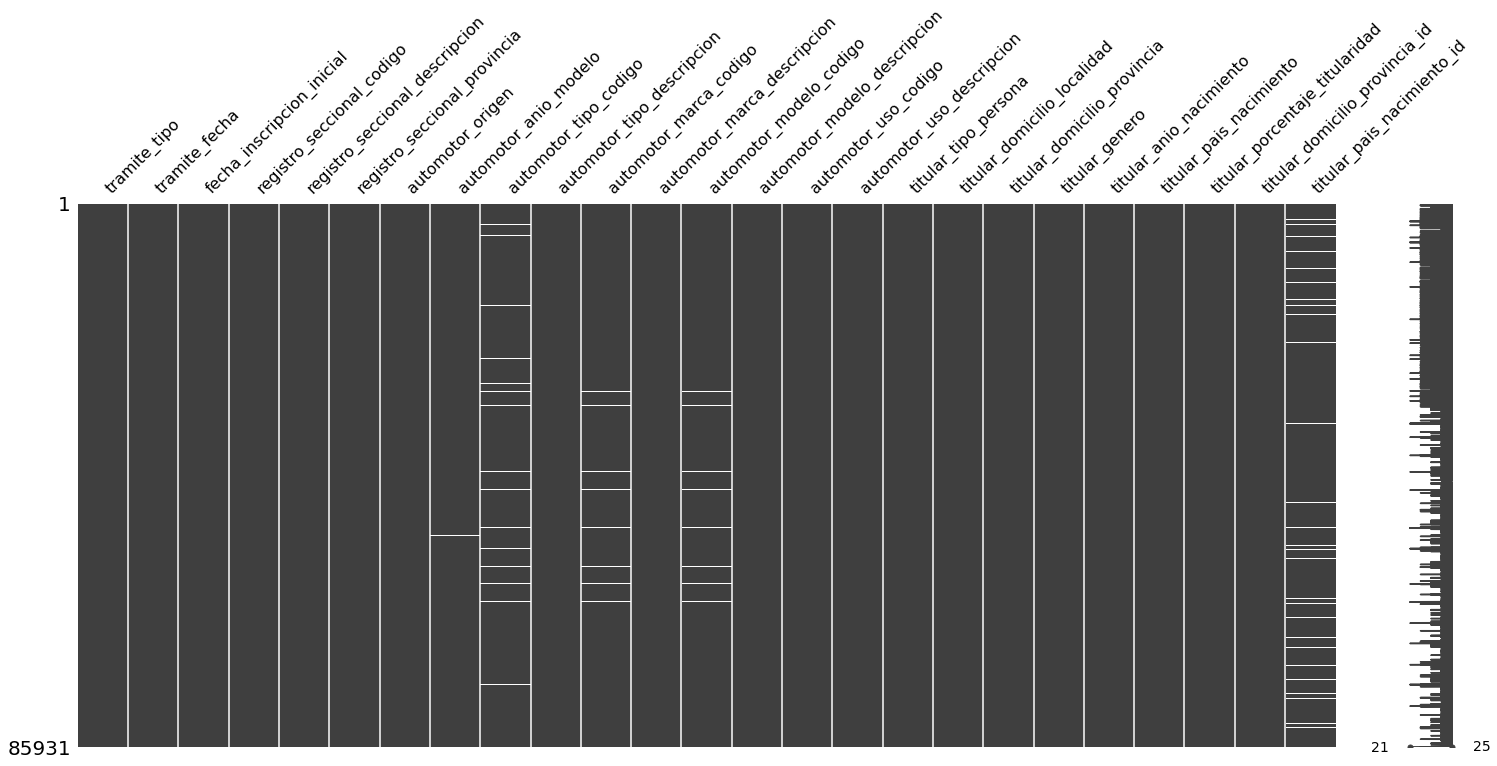

In [5]:
#Comprobando datos Nan, evidenciamos que la mayor parte de incompletos pertenecen a Nacionalidad del titular ("titular_pais_nacimiento_id")
import missingno as msno
%matplotlib inline
msno.matrix(dataFrame)

In [6]:
dataFrame.head()  


,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-14,1998-08-10,1001,ADROGUE Nº 1,Buenos Aires,Nacional,1998.0,NaN,RURAL 4 PTAS,...,Privado,Física,ADROGUE,BUENOS AIRES,Masculino,1955.0,ARGENTINA,100,6.0,ARG
1,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-10,1995-02-07,1005,AVELLANEDA Nº 2,Buenos Aires,Nacional,1995.0,NaN,FURGON VIDRIADO C/AS,...,Privado,Física,VILLA DOMINICO,BUENOS AIRES,No identificado,1964.0,ARGENTINA,100,6.0,ARG
2,COMUNICACIÓN DE RECUPERO,2020-01-16,2006-05-10,1043,LA PLATA Nº 01,Buenos Aires,Nacional,2006.0,NaN,FGON.VID.C/ASIENTOS,...,Privado,Jurídica,LA PLATA,BUENOS AIRES,No aplica,2000.0,No aplica,100,6.0,NaN
3,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-07,1997-05-07,1046,LA PLATA Nº 04,Buenos Aires,Nacional,1997.0,NaN,FURGON 3000,...,Privado,Física,LA PLATA,BUENOS AIRES,Femenino,1963.0,ARGENTINA,100,6.0,ARG
4,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-17,2007-09-26,1047,LANUS Nº 1,Buenos Aires,Nacional,2007.0,NaN,FURGON 600,...,Privado,Física,V.DIAMANTE,BUENOS AIRES,Masculino,1957.0,ARGENTINA,100,6.0,ARG


In [7]:
dataFrame.describe()  

,registro_seccional_codigo,automotor_anio_modelo,automotor_uso_codigo,titular_anio_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id
count,85931.000000,85727.000000,85931.000000,85916.000000,85931.000000,85930.000000
mean,3226.875039,2006.254389,1.013988,1977.413695,97.715237,12.482346
std,4898.902417,32.784863,0.277165,15.206384,10.510831,18.951968
min,1001.000000,20.000000,0.000000,1900.000000,1.000000,2.000000
25%,1160.000000,2000.000000,1.000000,1968.000000,100.000000,6.000000
50%,1250.000000,2008.000000,1.000000,1979.000000,100.000000,6.000000
75%,2060.000000,2013.000000,1.000000,1989.000000,100.000000,6.000000
max,24008.000000,2022.000000,9.000000,2500.000000,100.000000,94.000000
